# 01 - Problem (case study)

In [268]:
# Goal of this case study is to understand how the total claim amount of a customer can be explained by variabels

# 02 - Getting Data

In [306]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import Normalizer
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LinReg


In [270]:
data = pd.read_csv("marketing_customer_analysis.csv")

# 03 - Cleaning/Wrangling/EDA


In [271]:
def clean_name(data):
    data.columns=[e.lower().replace(' ', '_') for e in data.columns]
    return data


In [272]:
data = clean_name(data)

data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [273]:
#def convert_col_to_datetime(column_name, data):
 #   data[column_name] = pd.to_datetime(data[column_name], infer_datetime_format = True)
    


In [274]:
#data = convert_col_to_datetime("effective_to_date", data)

#data

In [275]:
#data

In [276]:
def removenan(df):
    df = df.dropna()


In [277]:
#removenan(data)
data.info(memory_usage='deep')
#visar inga NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [278]:
data=data.drop(columns=['customer'])   # drop useless columns (no info or nan)
data=data.dropna()   # drop rows with nan values

In [279]:
for c in data.columns.tolist():         # know the unique values for each column
    print(c, len(data[c].unique()))

state 5
customer_lifetime_value 8041
response 2
coverage 3
education 5
effective_to_date 59
employmentstatus 5
gender 2
income 5694
location_code 3
marital_status 3
monthly_premium_auto 202
months_since_last_claim 36
months_since_policy_inception 100
number_of_open_complaints 6
number_of_policies 9
policy_type 3
policy 9
renew_offer_type 4
sales_channel 4
total_claim_amount 5106
vehicle_class 6
vehicle_size 3


In [280]:
#categorical
data.select_dtypes(include = np.object)

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [281]:
#numerical
data.select_dtypes(exclude = np.object)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


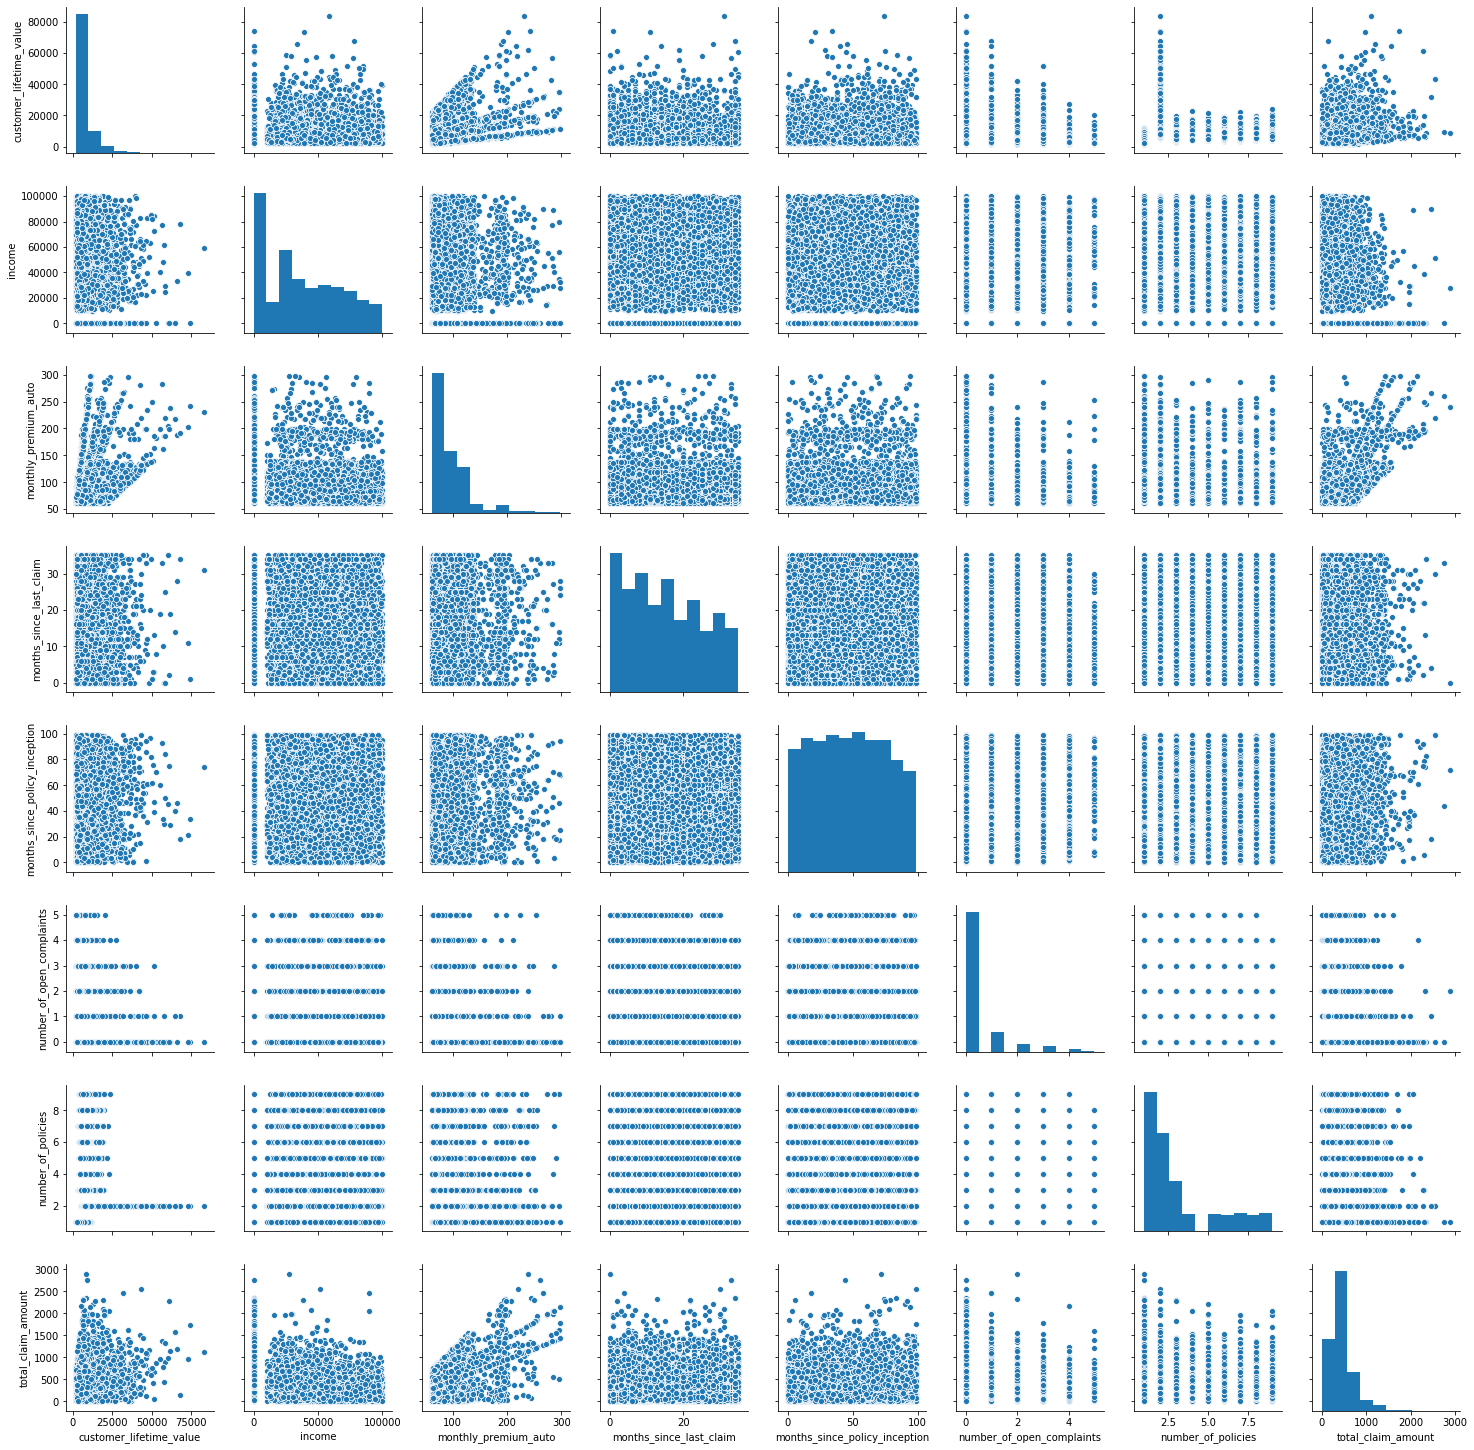

In [282]:
#explore
sns.pairplot(data)

# 04 - Processing Data

(array([2317.,  522., 1381.,  893.,  749.,  791.,  759.,  698.,  545.,
         479.]),
 array([    0. ,  9998.1, 19996.2, 29994.3, 39992.4, 49990.5, 59988.6,
        69986.7, 79984.8, 89982.9, 99981. ]),
 <a list of 10 Patch objects>)

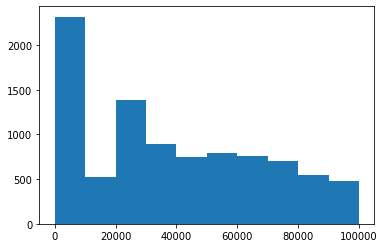

In [283]:
plt.hist(data["income"])

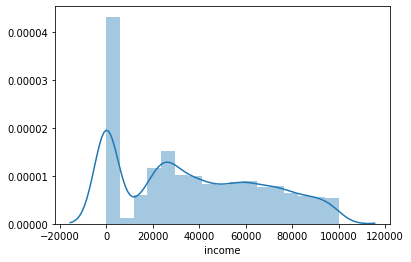

In [284]:
sns.distplot(data.income)
plt.show()

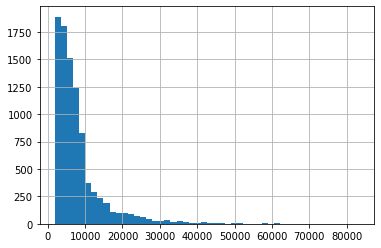

In [285]:
#Checking for normality
data_num = data._get_numeric_data()
data_num["customer_lifetime_value"].hist(bins=50)

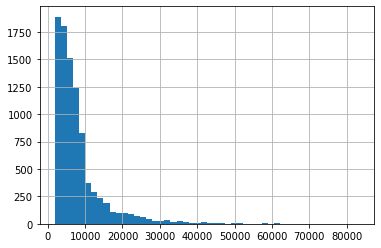

In [286]:
data["customer_lifetime_value"].hist(bins=50)

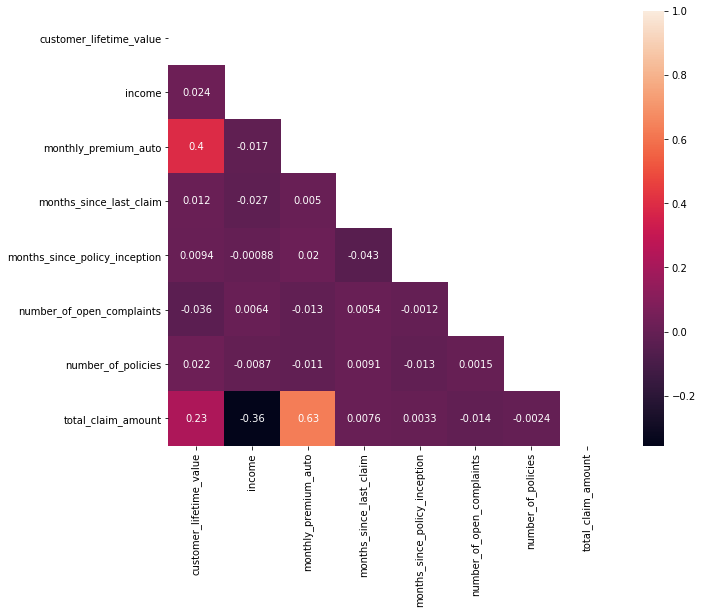

In [287]:
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)]=True

fig, ax=plt.subplots(figsize=(10, 8))
ax=sns.heatmap(data.corr(), mask=mask, annot=True)

plt.show()

#fig, ax gör samma sak som ovan, lägger in dom två variablerna i functionen subplots()
#visar multicolinarity 

In [288]:
#Normalization

In [289]:
transformer = Normalizer().fit(data_num)
x_normalized = transformer.transform(data_num)
print(x_normalized.shape)

(9134, 8)


In [290]:
#Encoding Categorical Data

In [291]:
cat_cols=[col for col in data.columns if (data[col].dtype==object)]     # categorical columns

one_hot_data=pd.get_dummies(data[cat_cols], drop_first=True)   # one hot encoding categorical variables

one_hot_data.head()

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,effective_to_date_1/10/11,effective_to_date_1/11/11,effective_to_date_1/12/11,effective_to_date_1/13/11,effective_to_date_1/14/11,effective_to_date_1/15/11,effective_to_date_1/16/11,effective_to_date_1/17/11,effective_to_date_1/18/11,effective_to_date_1/19/11,effective_to_date_1/2/11,effective_to_date_1/20/11,effective_to_date_1/21/11,effective_to_date_1/22/11,effective_to_date_1/23/11,effective_to_date_1/24/11,effective_to_date_1/25/11,effective_to_date_1/26/11,effective_to_date_1/27/11,effective_to_date_1/28/11,effective_to_date_1/29/11,effective_to_date_1/3/11,effective_to_date_1/30/11,effective_to_date_1/31/11,effective_to_date_1/4/11,effective_to_date_1/5/11,effective_to_date_1/6/11,effective_to_date_1/7/11,effective_to_date_1/8/11,effective_to_date_1/9/11,effective_to_date_2/1/11,effective_to_date_2/10/11,effective_to_date_2/11/11,effective_to_date_2/12/11,effective_to_date_2/13/11,effective_to_date_2/14/11,effective_to_date_2/15/11,effective_to_date_2/16/11,effective_to_date_2/17/11,effective_to_date_2/18/11,effective_to_date_2/19/11,effective_to_date_2/2/11,effective_to_date_2/20/11,effective_to_date_2/21/11,effective_to_date_2/22/11,effective_to_date_2/23/11,effective_to_date_2/24/11,effective_to_date_2/25/11,effective_to_date_2/26/11,effective_to_date_2/27/11,effective_to_date_2/28/11,effective_to_date_2/3/11,effective_to_date_2/4/11,effective_to_date_2/5/11,effective_to_date_2/6/11,effective_to_date_2/7/11,effective_to_date_2/8/11,effective_to_date_2/9/11,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [292]:
#Concat numerical and categorical DataFrames

data=pd.concat([data, one_hot_data], axis=1)   # concat dataframes
data.drop(columns=cat_cols, inplace=True)
data

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,effective_to_date_1/10/11,effective_to_date_1/11/11,effective_to_date_1/12/11,effective_to_date_1/13/11,effective_to_date_1/14/11,effective_to_date_1/15/11,effective_to_date_1/16/11,effective_to_date_1/17/11,effective_to_date_1/18/11,effective_to_date_1/19/11,effective_to_date_1/2/11,effective_to_date_1/20/11,effective_to_date_1/21/11,effective_to_date_1/22/11,effective_to_date_1/23/11,effective_to_date_1/24/11,effective_to_date_1/25/11,effective_to_date_1/26/11,effective_to_date_1/27/11,effective_to_date_1/28/11,effective_to_date_1/29/11,effective_to_date_1/3/11,effective_to_date_1/30/11,effective_to_date_1/31/11,effective_to_date_1/4/11,effective_to_date_1/5/11,effective_to_date_1/6/11,effective_to_date_1/7/11,effective_to_date_1/8/11,effective_to_date_1/9/11,effective_to_date_2/1/11,effective_to_date_2/10/11,effective_to_date_2/11/11,effective_to_date_2/12/11,effective_to_date_2/13/11,effective_to_date_2/14/11,effective_to_date_2/15/11,effective_to_date_2/16/11,effective_to_date_2/17/11,effective_to_date_2/18/11,effective_to_date_2/19/11,effective_to_date_2/2/11,effective_to_date_2/20/11,effective_to_date_2/21/11,effective_to_date_2/22/11,effective_to_date_2/23/11,effective_to_date_2/24/11,effective_to_date_2/25/11,effective_to_date_2/26/11,effective_to_date_2/27/11,effective_to_date_2/28/11,effective_to_date_2/3/11,effective_to_date_2/4/11,effective_to_date_2/5/11,effective_to_date_2/6/11,effective_to_date_2/7/11,effective_to_date_2/8/11,effective_to_date_2/9/11,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,2763.519279,56274,69,32,5,0,1,384.811147,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,6979.535903,0,94,13,42,0,8,1131.464935,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,12887.431650,48767,108,18,38,0,2,566.472247,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,7645.861827,0,106,18,65,0,7,529.881344,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,2813.692575,43836,73,12,44,0,1,138.130879,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [293]:
#Dealing with outliers

In [294]:
# e.g. 3*IQR in a column

q1=np.percentile(data['customer_lifetime_value'], 25)   # percentile 25
q3=np.percentile(data['customer_lifetime_value'], 75)   # percentile 75

iqr=q3-q1  # IQR

upper=q3+3*iqr   # upper boundary
lower=q1-3*iqr   # lower boundary
len(data[data['customer_lifetime_value']<lower])
len(data[data['customer_lifetime_value']>upper])

367

In [300]:
#Splitting into train set and test set.
# first, split X-y (learning-target data)
X=data.drop(columns=['total_claim_amount'])
y=data['total_claim_amount']
# checking shape
print(X.shape)
print(y.shape)
# we drop some useless columns
# x-y split


(9134, 108)
(9134,)


In [301]:
# first numerical and categorical split


X_num=X._get_numeric_data()
X_cat=X.drop(columns=X_num.columns)

print (X.shape, X_num.shape, X_cat.shape)  # check shape

(9134, 108) (9134, 108) (9134, 0)


In [302]:
X_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,effective_to_date_1/10/11,effective_to_date_1/11/11,effective_to_date_1/12/11,effective_to_date_1/13/11,effective_to_date_1/14/11,effective_to_date_1/15/11,effective_to_date_1/16/11,effective_to_date_1/17/11,effective_to_date_1/18/11,effective_to_date_1/19/11,effective_to_date_1/2/11,effective_to_date_1/20/11,effective_to_date_1/21/11,effective_to_date_1/22/11,effective_to_date_1/23/11,effective_to_date_1/24/11,effective_to_date_1/25/11,effective_to_date_1/26/11,effective_to_date_1/27/11,effective_to_date_1/28/11,effective_to_date_1/29/11,effective_to_date_1/3/11,effective_to_date_1/30/11,effective_to_date_1/31/11,effective_to_date_1/4/11,effective_to_date_1/5/11,effective_to_date_1/6/11,effective_to_date_1/7/11,effective_to_date_1/8/11,effective_to_date_1/9/11,effective_to_date_2/1/11,effective_to_date_2/10/11,effective_to_date_2/11/11,effective_to_date_2/12/11,effective_to_date_2/13/11,effective_to_date_2/14/11,effective_to_date_2/15/11,effective_to_date_2/16/11,effective_to_date_2/17/11,effective_to_date_2/18/11,effective_to_date_2/19/11,effective_to_date_2/2/11,effective_to_date_2/20/11,effective_to_date_2/21/11,effective_to_date_2/22/11,effective_to_date_2/23/11,effective_to_date_2/24/11,effective_to_date_2/25/11,effective_to_date_2/26/11,effective_to_date_2/27/11,effective_to_date_2/28/11,effective_to_date_2/3/11,effective_to_date_2/4/11,effective_to_date_2/5/11,effective_to_date_2/6/11,effective_to_date_2/7/11,effective_to_date_2/8/11,effective_to_date_2/9/11,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,2763.519279,56274,69,32,5,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,6979.535903,0,94,13,42,0,8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,12887.431650,48767,108,18,38,0,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,7645.861827,0,106,18,65,0,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,2813.692575,43836,73,12,44,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [303]:
X_cat

""
0
1
2
3
4
...
9129
9130
9131
9132


In [305]:
# train-test-split (4 sets)

X_train, X_test, y_train, y_test=tts(X, y, test_size=0.2, random_state=42)  # random state fixed sample

# 05 - Modeling


In [308]:
linreg=LinReg()    # model
linreg.fit(X_train, y_train)   # model train
y_pred_linreg=linreg.predict(X_test)   # model prediction


In [312]:
#Regularization

from sklearn.linear_model import Lasso       # L1
from sklearn.linear_model import Ridge       # L2
from sklearn.linear_model import ElasticNet  # L1+L2


In [313]:
# Lasso L1

lasso=Lasso()
lasso.fit(X_train, y_train)

y_pred_lasso=lasso.predict(X_test)